In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
df_train=pd.read_csv('train.csv')

In [169]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [170]:
df_test=pd.read_csv('test.csv')

<AxesSubplot:>

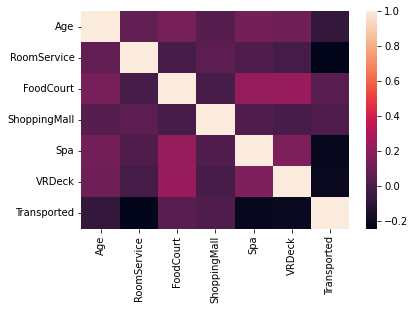

In [171]:
sns.heatmap(df_train.corr())

In [172]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [173]:
df_train=df_train.drop(['Cabin','Name'],axis=1)
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [174]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

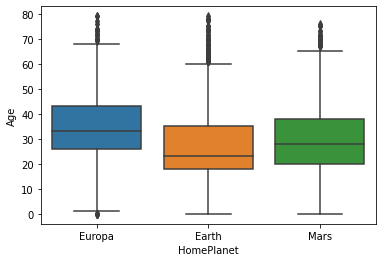

In [175]:
sns.boxplot(x='HomePlanet',y='Age',data=df_train)

In [176]:
def agemap(x):
    if np.isnan(x[0]):
        if x[1]=="Europa":
            return 34
        elif x[1]=="Earth":
            return 22
        else:
            return 28
    else:
        return x[0]

In [177]:
df_train['Age']=df_train[['Age','HomePlanet']].apply(agemap,axis=1)

In [178]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [179]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<AxesSubplot:xlabel='CryoSleep', ylabel='Age'>

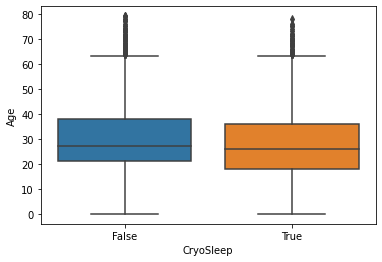

In [180]:
sns.boxplot(x='CryoSleep',y='Age',data=df_train)

In [181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [182]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [183]:
df_train=pd.get_dummies(df_train,columns=['HomePlanet','CryoSleep','VIP','Destination','Transported'],drop_first=True)

In [184]:
df_train.isnull().sum()

PassengerId                    0
Age                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
VIP_True                       0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Transported_True               0
dtype: int64

In [185]:
df_train[df_train['RoomService'].isnull()==True]

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported_True
25,0020_05,1.0,NaN,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0
35,0031_03,20.0,NaN,0.0,1750.0,990.0,0.0,0,1,0,0,0,1,1
83,0091_01,26.0,NaN,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1
132,0141_01,31.0,NaN,0.0,97.0,0.0,0.0,0,1,0,0,0,1,0
170,0193_02,23.0,NaN,0.0,8.0,1072.0,0.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,8998_02,47.0,NaN,1.0,0.0,967.0,5.0,0,0,0,0,0,1,0
8450,9026_01,58.0,NaN,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1
8525,9101_01,21.0,NaN,0.0,496.0,430.0,0.0,0,0,0,0,0,1,0
8534,9112_01,28.0,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0


C:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination_PSO J318.5-22', ylabel='Age'>

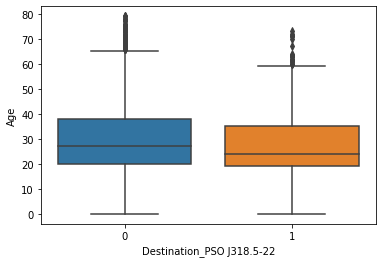

In [186]:
sns.boxplot('Destination_PSO J318.5-22','Age',data=df_train)

C:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VIP_True', ylabel='Age'>

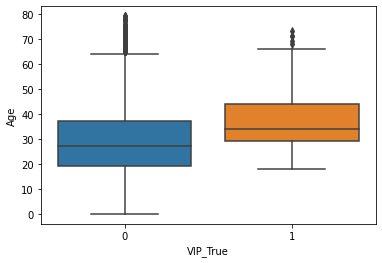

In [187]:
sns.boxplot('VIP_True','Age',data=df_train)

<AxesSubplot:>

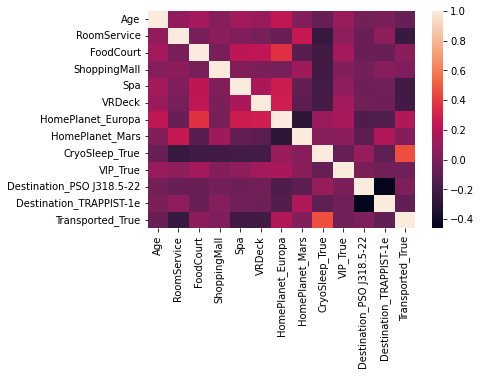

In [188]:
sns.heatmap(df_train.corr(),)

In [189]:
df_train=df_train.dropna()

In [190]:
df_train.set_index('PassengerId',inplace=True)

In [191]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
import xgboost

model=xgboost.XGBClassifier()
X=df_train.drop('Transported_True',axis=1)
y=df_train['Transported_True']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train,y_train)

pred=model.predict(X_test)
pred

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
print(accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1085
           1       0.82      0.77      0.80      1251

    accuracy                           0.79      2336
   macro avg       0.79      0.79      0.79      2336
weighted avg       0.79      0.79      0.79      2336

[[873 212]
 [283 968]]
0.7880993150684932


In [192]:
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [193]:
randomsearch=RandomizedSearchCV(model,param_distributions=parameters,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [194]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [195]:
from datetime import datetime
start_time=timer(None)
randomsearch.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 3.89 seconds.


In [196]:
randomsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [197]:
str(randomsearch.best_estimator_)

"XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,\n              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,\n              early_stopping_rounds=None, enable_categorical=False,\n              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',\n              importance_type=None, interaction_constraints='',\n              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,\n              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=7,\n              missing=nan, monotone_constraints='()', n_estimators=100,\n              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,\n              reg_alpha=0, reg_lambda=1, ...)"

In [198]:
randomsearch.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [199]:
tunedmodel=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

NameError: name 'nan' is not defined

In [ ]:
tunedmodel=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=7,
              missing=np.nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [200]:
cross_val_score(tunedmodel,X,y,cv=10)

array([0.80487805, 0.77406932, 0.78562259, 0.7843389 , 0.7830552 ,
       0.80976864, 0.80848329, 0.8033419 , 0.80719794, 0.80719794])

In [201]:
cross_val_score(tunedmodel,X,y,cv=10).mean()

0.796795377370632

In [202]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier()

# model.fit(X_train,y_train)

# pred=model.predict(X_test)
# print(accuracy_score(pred,y_test))
# print(classification_report(pred,y_test))
# print(confusion_matrix(pred,y_test))

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()

In [206]:
scaler.fit(X_train)

MinMaxScaler()

In [207]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [209]:
X_train.shape

(5838, 12)

In [210]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [211]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
183/183 [==============================] - 1s 2ms/step - loss: 0.6289 - val_loss: 0.5673
Epoch 2/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5338 - val_loss: 0.5218
Epoch 3/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4947 - val_loss: 0.4869
Epoch 4/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4674 - val_loss: 0.4728
Epoch 5/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4511 - val_loss: 0.4554
Epoch 6/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4434 - val_loss: 0.4481
Epoch 7/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4393 - val_loss: 0.4460
Epoch 8/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4353 - val_loss: 0.4441
Epoch 9/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4356 - val_loss: 0.4442
Epoch 10/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4341 - val_lo

183/183 [==============================] - 0s 1ms/step - loss: 0.4186 - val_loss: 0.4241
Epoch 82/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.4245
Epoch 83/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4184 - val_loss: 0.4261
Epoch 84/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4183 - val_loss: 0.4269
Epoch 85/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4178 - val_loss: 0.4249
Epoch 86/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4179 - val_loss: 0.4319
Epoch 87/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4191 - val_loss: 0.4255
Epoch 88/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4184 - val_loss: 0.4282
Epoch 89/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.4260
Epoch 90/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 

Epoch 161/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.4266
Epoch 162/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4160 - val_loss: 0.4255
Epoch 163/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4129 - val_loss: 0.4322
Epoch 164/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4133 - val_loss: 0.4254
Epoch 165/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4137 - val_loss: 0.4330
Epoch 166/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.4242
Epoch 167/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4134 - val_loss: 0.4275
Epoch 168/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.4260
Epoch 169/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4138 - val_loss: 0.4275
Epoch 170/600
183/183 [==============================] - 0s 1ms/step - lo

183/183 [==============================] - 0s 1ms/step - loss: 0.4113 - val_loss: 0.4271
Epoch 241/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4115 - val_loss: 0.4270
Epoch 242/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4121 - val_loss: 0.4250
Epoch 243/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.4231
Epoch 244/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4113 - val_loss: 0.4250
Epoch 245/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4114 - val_loss: 0.4247
Epoch 246/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4099 - val_loss: 0.4235
Epoch 247/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.4259
Epoch 248/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4116 - val_loss: 0.4243
Epoch 249/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4118 - v

183/183 [==============================] - 0s 1ms/step - loss: 0.4094 - val_loss: 0.4252
Epoch 320/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4076 - val_loss: 0.4275
Epoch 321/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.4255
Epoch 322/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4086 - val_loss: 0.4259
Epoch 323/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4081 - val_loss: 0.4273
Epoch 324/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.4263
Epoch 325/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4087 - val_loss: 0.4271
Epoch 326/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4090 - val_loss: 0.4242
Epoch 327/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4082 - val_loss: 0.4243
Epoch 328/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4095 - v

183/183 [==============================] - 0s 1ms/step - loss: 0.4059 - val_loss: 0.4286
Epoch 399/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4066 - val_loss: 0.4255
Epoch 400/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4050 - val_loss: 0.4259
Epoch 401/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4065 - val_loss: 0.4259
Epoch 402/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4067 - val_loss: 0.4250
Epoch 403/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4069 - val_loss: 0.4234
Epoch 404/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.4239
Epoch 405/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4059 - val_loss: 0.4244
Epoch 406/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4068 - val_loss: 0.4258
Epoch 407/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4055 - v

183/183 [==============================] - 0s 1ms/step - loss: 0.4042 - val_loss: 0.4262
Epoch 478/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4028 - val_loss: 0.4260
Epoch 479/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4031 - val_loss: 0.4306
Epoch 480/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4035 - val_loss: 0.4278
Epoch 481/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4037 - val_loss: 0.4275
Epoch 482/600
158/183 [========================>.....] - ETA: 0s - loss: 0.4052

KeyboardInterrupt: 

In [ ]:
# model.history.history

In [114]:
model_loss = pd.DataFrame(model.history.history)

In [115]:
# model_loss

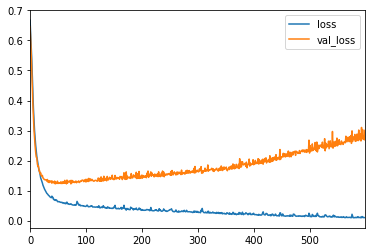

In [116]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [117]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [216]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [217]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [218]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
183/183 [==============================] - 1s 2ms/step - loss: 0.6916 - val_loss: 0.6621
Epoch 2/600
183/183 [==============================] - 0s 1ms/step - loss: 0.6498 - val_loss: 0.6084
Epoch 3/600
183/183 [==============================] - 0s 1ms/step - loss: 0.6089 - val_loss: 0.5693
Epoch 4/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5865 - val_loss: 0.5533
Epoch 5/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5696 - val_loss: 0.5331
Epoch 6/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5482 - val_loss: 0.5210
Epoch 7/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5457 - val_loss: 0.5047
Epoch 8/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5323 - val_loss: 0.4931
Epoch 9/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5298 - val_loss: 0.4840
Epoch 10/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5155 - val_lo

183/183 [==============================] - 0s 1ms/step - loss: 0.4564 - val_loss: 0.4308
Epoch 82/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4510 - val_loss: 0.4310
Epoch 83/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4565 - val_loss: 0.4300
Epoch 84/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4569 - val_loss: 0.4290
Epoch 85/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4501 - val_loss: 0.4312
Epoch 86/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4540 - val_loss: 0.4297
Epoch 87/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4525 - val_loss: 0.4295
Epoch 88/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4506 - val_loss: 0.4302
Epoch 89/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4489 - val_loss: 0.4291
Epoch 90/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4477 - val_loss: 

Epoch 161/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4445 - val_loss: 0.4298
Epoch 162/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4444 - val_loss: 0.4303
Epoch 163/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4446 - val_loss: 0.4299
Epoch 164/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4478 - val_loss: 0.4272
Epoch 165/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4528 - val_loss: 0.4296
Epoch 166/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4452 - val_loss: 0.4290
Epoch 167/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4504 - val_loss: 0.4266
Epoch 168/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4459 - val_loss: 0.4304
Epoch 169/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4426 - val_loss: 0.4267
Epoch 170/600
183/183 [==============================] - 0s 1ms/step - lo

<AxesSubplot:>

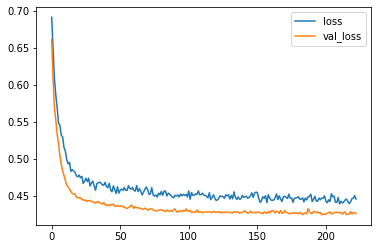

In [219]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [220]:
from tensorflow.keras.layers import Dropout

In [221]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [222]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
183/183 [==============================] - 1s 2ms/step - loss: 0.6700 - val_loss: 0.6201
Epoch 2/600
183/183 [==============================] - 0s 1ms/step - loss: 0.6114 - val_loss: 0.5728
Epoch 3/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5931 - val_loss: 0.5567
Epoch 4/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5783 - val_loss: 0.5454
Epoch 5/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5650 - val_loss: 0.5351
Epoch 6/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5589 - val_loss: 0.5227
Epoch 7/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5106
Epoch 8/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5294 - val_loss: 0.5016
Epoch 9/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5274 - val_loss: 0.4927
Epoch 10/600
183/183 [==============================] - 0s 1ms/step - loss: 0.5166 - val_lo

183/183 [==============================] - 0s 1ms/step - loss: 0.4555 - val_loss: 0.4297
Epoch 82/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4500 - val_loss: 0.4285
Epoch 83/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4530 - val_loss: 0.4281
Epoch 84/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4470 - val_loss: 0.4279
Epoch 85/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4529 - val_loss: 0.4281
Epoch 86/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4466 - val_loss: 0.4279
Epoch 87/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4542 - val_loss: 0.4309
Epoch 88/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4542 - val_loss: 0.4321
Epoch 89/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4470 - val_loss: 0.4321
Epoch 90/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4514 - val_loss: 

Epoch 161/600
183/183 [==============================] - 0s 1ms/step - loss: 0.4524 - val_loss: 0.4266
Epoch 161: early stopping


<AxesSubplot:>

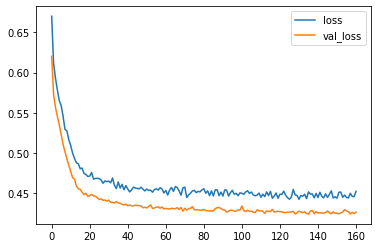

In [224]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [230]:
predictions =(model.predict(X_test) > 0.5).astype("int32")

61/61 [==============================] - 0s 742us/step


In [231]:
from sklearn.metrics import classification_report,confusion_matrix

In [232]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       965
           1       0.78      0.85      0.81       982

    accuracy                           0.80      1947
   macro avg       0.81      0.80      0.80      1947
weighted avg       0.81      0.80      0.80      1947



In [233]:
print(confusion_matrix(y_test,predictions))

[[730 235]
 [146 836]]


In [134]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [135]:
df_test=df_test.drop(['Cabin','Name'],axis=1)
df_test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [136]:
def agemap(x):
    if np.isnan(x[0]):
        if x[1]=="Europa":
            return 34
        elif x[1]=="Earth":
            return 22
        else:
            return 28
    else:
        return x[0]

In [137]:
df_test['Age']=df_test[['Age','HomePlanet']].apply(agemap,axis=1)

In [138]:
df_test=pd.get_dummies(df_test,columns=['HomePlanet','CryoSleep','VIP','Destination'],drop_first=True)

In [139]:
df_test

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
4273,9269_01,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,0,1
4274,9271_01,28.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0
4275,9273_01,34.0,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,0,0


In [140]:
df_test.isnull().sum()

PassengerId                    0
Age                            0
RoomService                   82
FoodCourt                    106
ShoppingMall                  98
Spa                          101
VRDeck                        80
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
VIP_True                       0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

In [141]:
rs_null=df_test[df_test['RoomService'].isnull()==True].index
rs_null

Int64Index([  21,   38,   73,  136,  140,  141,  148,  172,  225,  236,  314,
             345,  348,  484,  556,  559,  565,  595,  629,  752, 1004, 1007,
            1106, 1121, 1202, 1222, 1341, 1427, 1603, 1607, 1688, 1781, 1803,
            1845, 1982, 2061, 2091, 2168, 2177, 2239, 2283, 2331, 2357, 2361,
            2395, 2414, 2506, 2560, 2691, 2762, 2787, 2795, 2855, 2878, 2889,
            3012, 3047, 3072, 3105, 3118, 3126, 3148, 3184, 3251, 3266, 3514,
            3532, 3605, 3617, 3631, 3639, 3657, 3701, 3755, 3777, 3788, 4015,
            4119, 4171, 4241, 4251, 4255],
           dtype='int64')

In [142]:
fc_null=df_test[df_test['FoodCourt'].isnull()==True].index
fc_null

Int64Index([   6,   93,  117,  128,  134,  185,  199,  312,  387,  405,
            ...
            3821, 3826, 3918, 3936, 3945, 4069, 4071, 4120, 4150, 4231],
           dtype='int64', length=106)

In [143]:
sm_null=df_test[df_test['ShoppingMall'].isnull()==True].index
sm_null

Int64Index([  11,   48,  183,  276,  354,  385,  433,  488,  500,  512,  544,
             547,  587,  669,  729,  826,  853,  859,  863, 1023, 1033, 1065,
            1124, 1135, 1151, 1180, 1192, 1253, 1270, 1367, 1374, 1403, 1468,
            1475, 1477, 1524, 1548, 1551, 1658, 1723, 1737, 1800, 1844, 1908,
            1918, 1959, 2060, 2105, 2153, 2169, 2191, 2234, 2245, 2348, 2462,
            2537, 2660, 2684, 2760, 2784, 2791, 2901, 2902, 2934, 2961, 2966,
            3043, 3093, 3170, 3206, 3208, 3276, 3357, 3367, 3458, 3500, 3512,
            3519, 3594, 3627, 3747, 3751, 3758, 3763, 3772, 3866, 3892, 3942,
            3975, 3999, 4039, 4043, 4167, 4196, 4198, 4219, 4230, 4248],
           dtype='int64')

In [144]:
vr_null=df_test[df_test['VRDeck'].isnull()==True].index
vr_null

Int64Index([  15,  105,  128,  161,  177,  209,  211,  278,  307,  385,  410,
             413,  419,  435,  557,  561,  578,  584,  598,  627,  738,  812,
            1056, 1206, 1216, 1275, 1350, 1414, 1443, 1513, 1580, 1591, 1766,
            1820, 1833, 1964, 2042, 2129, 2296, 2376, 2383, 2433, 2519, 2547,
            2571, 2591, 2600, 2608, 2642, 2643, 2713, 3000, 3114, 3128, 3220,
            3323, 3342, 3359, 3434, 3438, 3512, 3530, 3535, 3581, 3619, 3707,
            3734, 3766, 3800, 3806, 3844, 3912, 3952, 3977, 3981, 4016, 4127,
            4131, 4188, 4192],
           dtype='int64')

In [145]:
spa_null=df_test[df_test['Spa'].isnull()==True].index
spa_null

Int64Index([ 201,  234,  292,  378,  388,  436,  460,  499,  543,  566,
            ...
            3572, 3590, 3673, 3674, 3712, 3923, 4002, 4040, 4083, 4146],
           dtype='int64', length=101)

In [146]:
df_test['RoomService'][rs_null]=df_test['RoomService'].mean()
df_test['ShoppingMall'][sm_null]=df_test['ShoppingMall'].mean()
df_test['FoodCourt'][fc_null]=df_test['FoodCourt'].mean()
df_test['VRDeck'][vr_null]=df_test['VRDeck'].mean()
df_test['Spa'][spa_null]=df_test['Spa'].mean()

C:\Users\vijay\AppData\Local\Temp\ipykernel_16532\2774301251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RoomService'][rs_null]=df_test['RoomService'].mean()
C:\Users\vijay\AppData\Local\Temp\ipykernel_16532\2774301251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ShoppingMall'][sm_null]=df_test['ShoppingMall'].mean()
C:\Users\vijay\AppData\Local\Temp\ipykernel_16532\2774301251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [147]:
df_test.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
VIP_True                     0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [148]:
df_test.set_index('PassengerId',inplace=True)

In [149]:
df_test.shape,X_test.shape

((4277, 12), (2336, 12))

In [150]:
df_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,1
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,1
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
9269_01,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,0,1
9271_01,28.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0


In [151]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,,
3283_01,43.0,0.0,16.0,34.0,753.0,1.0,0,0,0,0,0,1
7999_01,26.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
6450_02,42.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
0686_01,18.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1
4777_01,31.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6201_01,34.0,0.0,1174.0,0.0,130.0,1141.0,1,0,0,1,0,0
6399_01,47.0,0.0,106.0,2915.0,0.0,1200.0,0,0,0,0,0,1
1027_02,46.0,1454.0,0.0,81.0,38.0,0.0,0,1,0,0,0,1


In [152]:

# pred=model.predict(df_test)
# pred

# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# print(classification_report(pred,y_test))
# print(confusion_matrix(pred,y_test))
# print(accuracy_score(pred,y_test))

In [153]:
pred=model.predict(df_test)
pred

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [154]:
pred=pd.DataFrame(pred)
pred

,0
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [155]:
answer=pd.concat([df_test['PassengerId'],pred],axis=1)
answer

KeyError: 'PassengerId'

In [161]:
df_test=df_test.reset_index()
df_test

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
4273,9269_01,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,0,1
4274,9271_01,28.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0
4275,9273_01,34.0,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,0,0


In [162]:
answer=pd.concat([df_test['PassengerId'],pred],axis=1)
answer

,PassengerId,0
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [163]:
answer.columns=['PassengerId','Transported']
answer

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [164]:
def trans(x):
    if x == 0:
        return False
    else:
        return True

In [165]:
answer['Transported']=answer['Transported'].apply(trans)
answer

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [166]:
answer.to_csv('submission.csv',index=False)